### ***EJERCICIO 1*** **CABRERA HERNANDEZ NAOMI ITZEL**

**Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30].**


**Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10.**


***a)Por simulacion*** \
***b)Analiticamente***

**a)Por simulacion: Construimos el modelo en varios pasos**

**PASO 1.** Identifique las variables 

Tenemos dos: $x_1$ y $x_2$.

**PASO 2 y 3.** Determine la distribución de probabilidad y modele las variables aleatorias 

 $x_1 \sim U(0,30)$
 
  $x_2 \sim U(0,30)$.

**PASO 4.** Defina el modelo del sistema y los objetivos de la simulación 

La diferencia $|x_1 - x_2|$ modela adecuadamente el sistema.

Si $|x_2 - x_1| > 10$ 
si a persona espera mas de 10 min, supera el tiempo de espera. 
$|x_2 - x_1| \leq 10$ De lo contrario, el tiempo que espera una persona a la otra es maximo de 10 


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def llegada():                
    positivo=0                      
    x_1 = random.uniform(0,30) 
    x_2 = random.uniform(0,30)
    if  abs(x_2 - x_1)<=10.0 :
        positivo += 1
    return positivo

In [3]:
llegada()

0

**PASO 5.** Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [4]:
def prob_llegar(n):                    
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    pos = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que 
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        pos += llegada()
        prob.append(pos/(i+1))
    return prob

In [5]:
X = prob_llegar(500) 

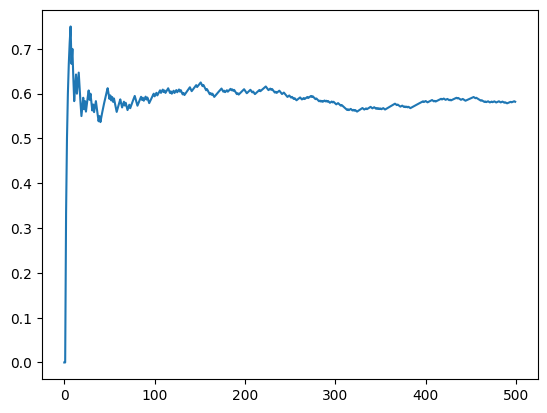

In [6]:
plt.plot(X) 

In [7]:
print(np.mean(X), np.std(X))

0.586223971665245 0.043709946794354575


**PASO 6.** Repita el experimento $n$ veces 

In [9]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_llegar(500)
        lista.append(np.mean(s))
    return lista

In [10]:
Y=modelo(120)

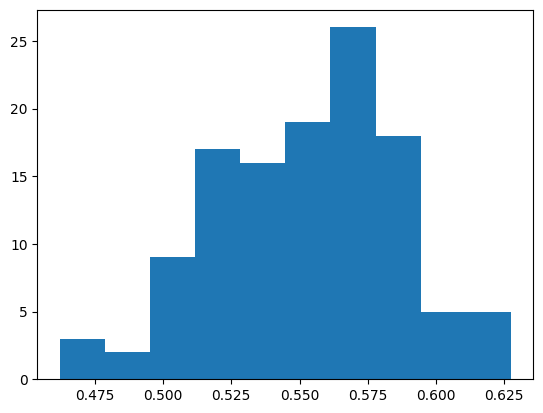

In [11]:
plt.hist(Y)
plt.show()

In [12]:
print(np.mean(Y), np.std(Y))

0.5527021571322606 0.0334143449063436


**PASO 7.** Hallamos el intervalo de confianza del 95%



$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [13]:
np.mean(Y)

0.5527021571322606

In [14]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.5434401732623654, 0.5619641410021557)

**b)Analiticamente**

Definimos anteriormente dos variables por lo que tenemos

$f(x_i)=\frac{1}{b-a}=\frac{1}{30}$

por lo que





f(x) =${\begin{array}{lcc}
    \frac{1}{30^2} & si & 0 \leq x_1,x_2 \leq 30 \\
     0 & des otra manera \\
\end{array}}$

Por lo que tenemos la siguiente integral 

$ 1-2  \int_{10}^{30} \! \int_{0}^{x_1-10} \! \frac{1}{30^2} \,dx_2 dx_1 $ 


Al realizarla en alguna aplicacion tenemos lo siguiente

$\frac{5}{8} =0.555 $

La probabilidad es del 55.55%